# Import Library & Load Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
from IPython.display import display, Markdown

In [83]:
df=pd.read_csv("./GlobalTerrorismDataset.csv",encoding='ISO-8859-1',low_memory=False)

# Dataset 분석

In [84]:
# 첫 5개의 행을 출력
display(Markdown("### Preview of the Dataset:"))
display(df.head())

# 데이터프레임의 크기 출력
display(Markdown(f"**Dataset Dimensions:** {df.shape[0]} rows and {df.shape[1]} columns."))

# 중복 행 확인
duplicate_count = df.duplicated().sum()
display(Markdown(f"**Duplicate Rows:** {duplicate_count} duplicate rows in the dataset."))

# 결측값 확인
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values != 0]  # 결측값이 있는 열만 필터링
if not missing_values.empty:
    display(Markdown("### Missing Values by Column:"))
    display(missing_values.to_frame(name='Missing Values'))
else:
    display(Markdown("**No missing values found in the dataset.**"))

### Preview of the Dataset:

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


**Dataset Dimensions:** 181691 rows and 135 columns.

**Duplicate Rows:** 0 duplicate rows in the dataset.

### Missing Values by Column:

,Missing Values
approxdate,172452
resolution,179471
provstate,421
city,435
latitude,4556
...,...
addnotes,153402
scite1,66191
scite2,104758
scite3,138175


# 데이터 변형

In [85]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State','region_txt':'Region','attacktype1_txt':'Attacktype','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
data=df[['Year','Month','Day','Country','State','Region','city','latitude','longitude','Attacktype','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
data.head()

,Year,Month,Day,Country,State,Region,city,latitude,longitude,Attacktype,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


# 데이터 시각화

/var/folders/t1/c1qhch0n58j9kw492l10zm5m0000gn/T/ipykernel_37227/1263617028.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


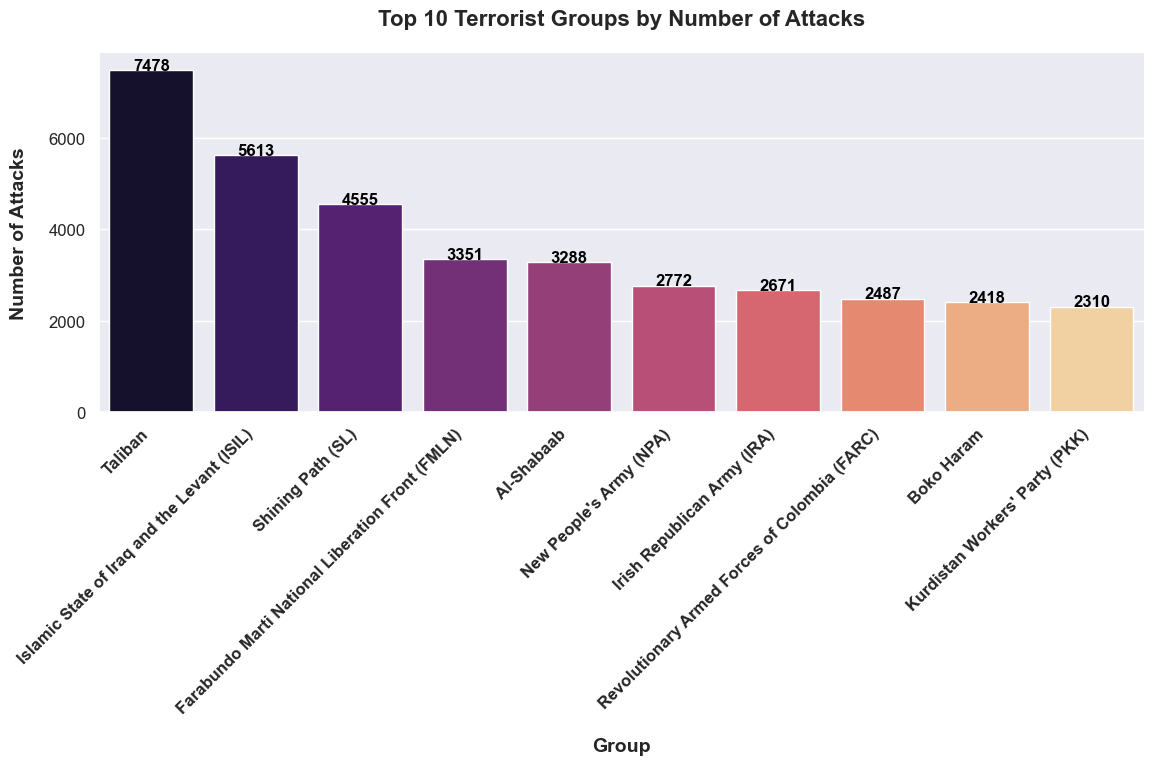

In [86]:
# 공격 횟수 기준 상위 10개 조직

# 데이터 준비
top_groups = data[data['Group'] != 'Unknown']['Group'].value_counts().head(10)

# 그래프 설정
plt.figure(figsize=(12, 8))
sns.barplot(
    x=top_groups.index,
    y=top_groups.values,
    palette="magma"
)

# 그래프 제목 및 레이블 설정
plt.title("Top 10 Terrorist Groups by Number of Attacks", fontsize=16, weight='bold', pad=20)
plt.xlabel("Group", fontsize=14, weight='bold', labelpad=15)
plt.ylabel("Number of Attacks", fontsize=14, weight='bold', labelpad=15)
plt.xticks(rotation=45, fontsize=12, weight='bold', ha='right')
plt.yticks(fontsize=12)
sns.despine()

# 값 표시
for index, value in enumerate(top_groups.values):
    plt.text(
        x=index,
        y=value + 5,  # 약간 위에 표시
        s=f"{value}",
        ha='center',
        fontsize=12,
        color="black",
        weight='bold'
    )

# 그래프 출력
plt.tight_layout()
plt.show()

/var/folders/t1/c1qhch0n58j9kw492l10zm5m0000gn/T/ipykernel_37227/3744064667.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


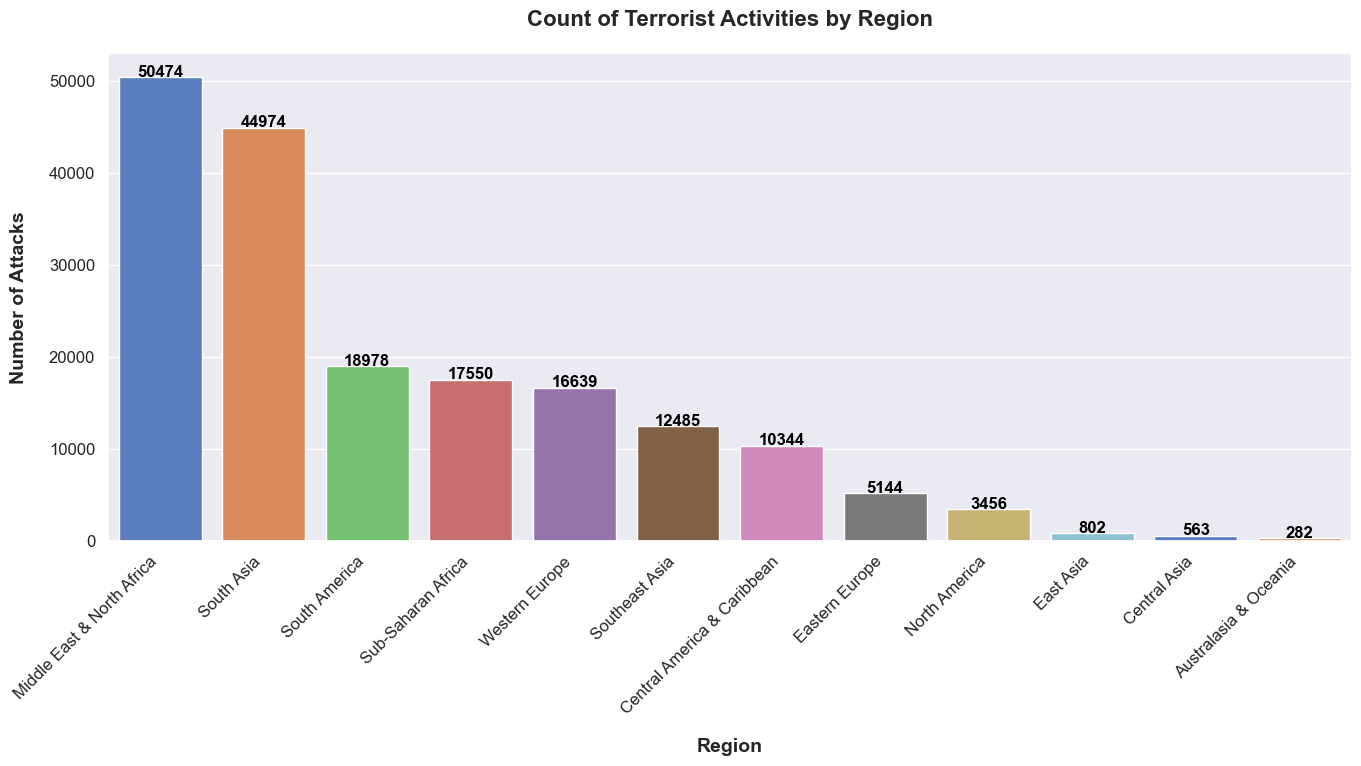

In [87]:
# 공격 당한 나라별 횟수 (Region 기준)

# 그래프 설정
plt.figure(figsize=(14, 8))
sns.countplot(
    data=data, 
    x='Region', 
    palette='muted', 
    order=data['Region'].value_counts().index  # 지역별 빈도에 따라 정렬
)

# 제목 및 레이블 설정
plt.title("Count of Terrorist Activities by Region", fontsize=16, weight='bold', pad=20)
plt.xlabel("Region", fontsize=14, weight='bold', labelpad=15)
plt.ylabel("Number of Attacks", fontsize=14, weight='bold', labelpad=15)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.yticks(fontsize=12)
sns.despine()

# 값 표시
for index, count in enumerate(data['Region'].value_counts().values):
    plt.text(
        x=index, 
        y=count + 50,  # 막대 위에 여유를 두고 표시
        s=f"{count}", 
        ha='center',
        fontsize=12,
        color="black",
        weight='bold'
    )

# 그래프 출력
plt.tight_layout()
plt.show()

/var/folders/t1/c1qhch0n58j9kw492l10zm5m0000gn/T/ipykernel_37227/2937845818.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


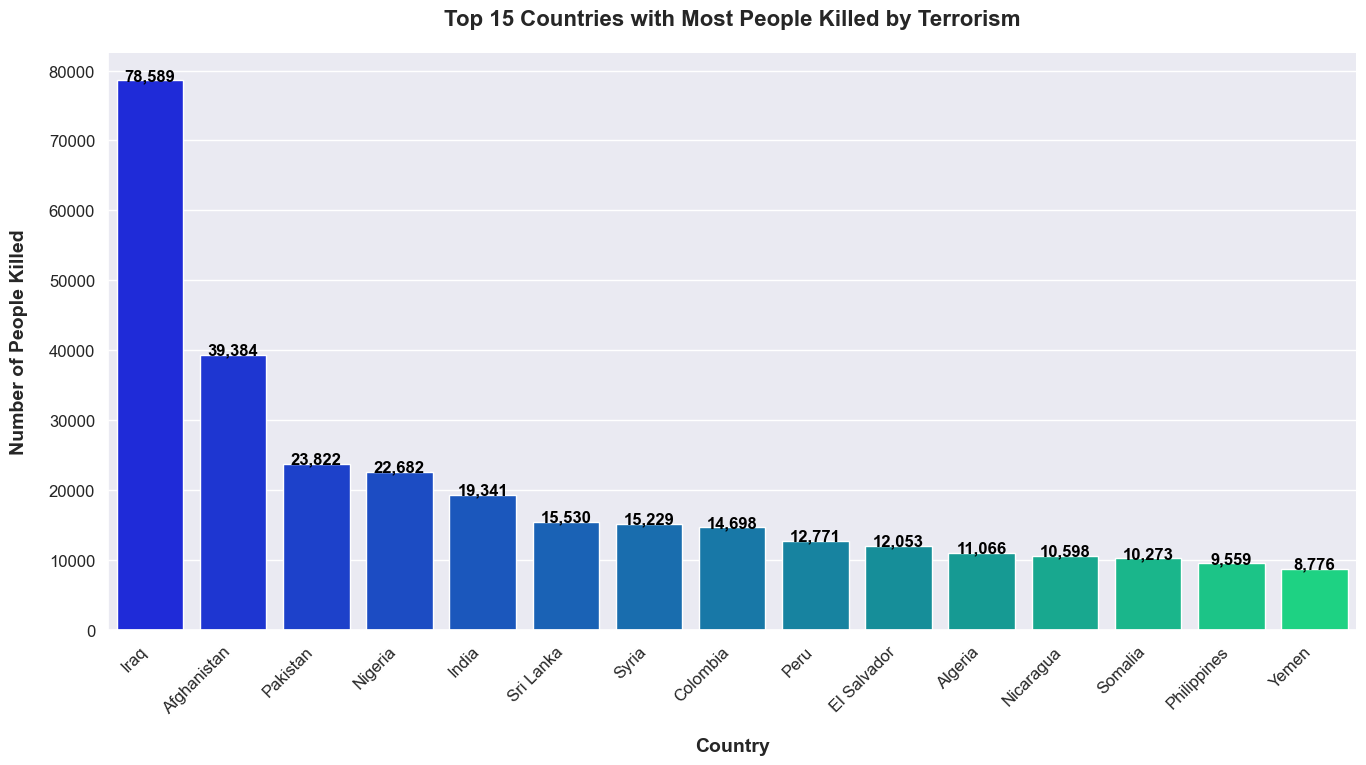

In [88]:
# 테러로 인해 사망자 수가 가장 많은 상위 15개 국가

# 데이터 정리
country_kill = data.groupby('Country')['Killed'].sum()  # 총 사망자 수 기준
country_killed = country_kill.sort_values(ascending=False)[:15]

# 그래프 설정
plt.figure(figsize=(14, 8))
sns.barplot(
    x=country_killed.index, 
    y=country_killed.values, 
    palette='winter'
)

# 제목 및 레이블 설정
plt.title("Top 15 Countries with Most People Killed by Terrorism", fontsize=16, weight='bold', pad=20)
plt.xlabel("Country", fontsize=14, weight='bold', labelpad=15)
plt.ylabel("Number of People Killed", fontsize=14, weight='bold', labelpad=15)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.yticks(fontsize=12)
sns.despine()

# 값 표시
for index, value in enumerate(country_killed.values):
    plt.text(
        x=index, 
        y=value + 50,  # 막대 위에 여유 공간을 두고 표시
        s=f"{int(value):,}",  # 숫자를 쉼표로 포맷팅
        ha='center',
        fontsize=12,
        color="black",
        weight='bold'
    )

# 레이아웃 정리 및 그래프 출력
plt.tight_layout()
plt.show()

/var/folders/t1/c1qhch0n58j9kw492l10zm5m0000gn/T/ipykernel_37227/2424443627.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


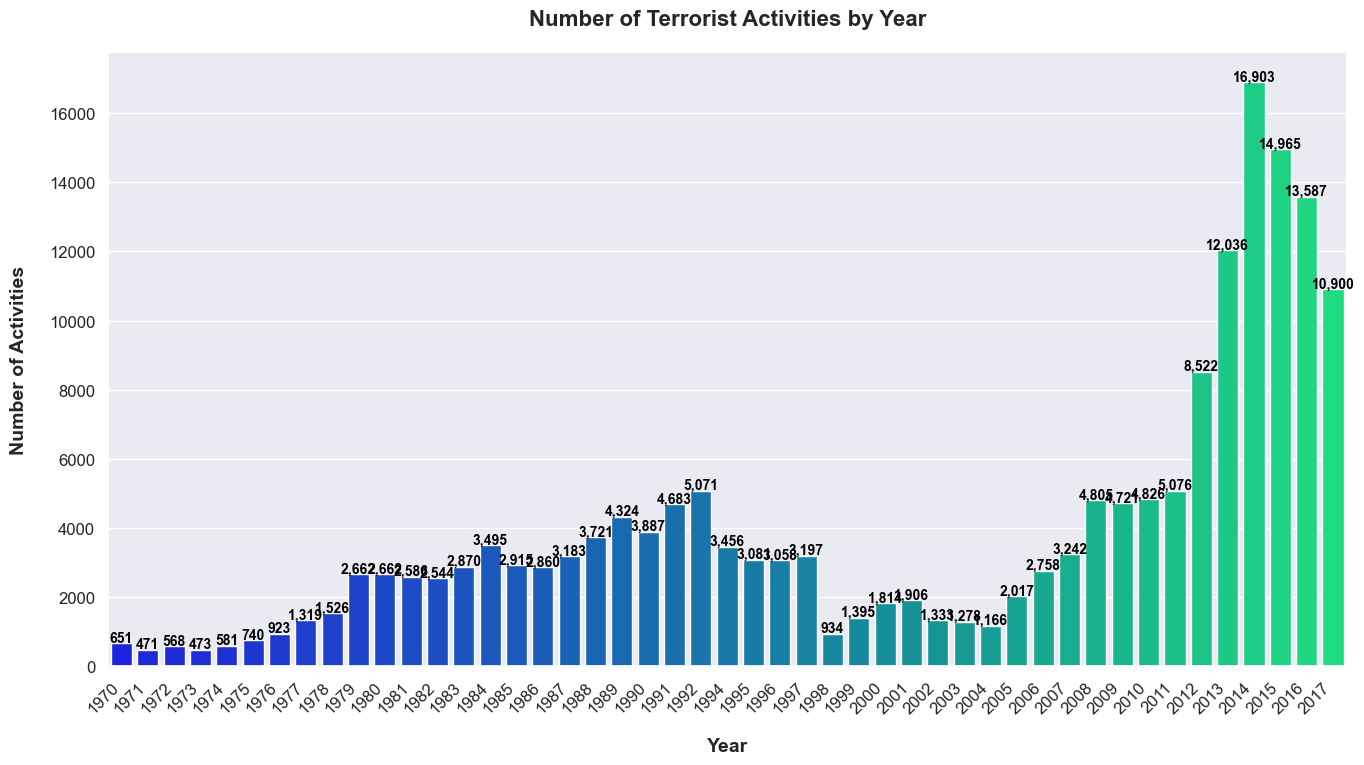

In [89]:
# 연도별 테러가 일어난 횟수

# 그래프 설정
plt.figure(figsize=(14, 8))
sns.countplot(
    data=data, 
    x='Year', 
    palette='winter', 
    order=data['Year'].value_counts().sort_index().index  # 연도 순서대로 정렬
)

# 제목 및 레이블 설정
plt.title("Number of Terrorist Activities by Year", fontsize=16, weight='bold', pad=20)
plt.xlabel("Year", fontsize=14, weight='bold', labelpad=15)
plt.ylabel("Number of Activities", fontsize=14, weight='bold', labelpad=15)
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.yticks(fontsize=12)
sns.despine()

# 값 표시
for index, value in enumerate(data['Year'].value_counts().sort_index().values):
    plt.text(
        x=index, 
        y=value + 50,  # 막대 위에 여유 공간을 두고 표시
        s=f"{value:,}",  # 숫자를 쉼표로 포맷팅
        ha='center',
        fontsize=10,
        color="black",
        weight='bold'
    )

# 레이아웃 정리 및 그래프 출력
plt.tight_layout()
plt.show()


/var/folders/t1/c1qhch0n58j9kw492l10zm5m0000gn/T/ipykernel_37227/2995202162.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


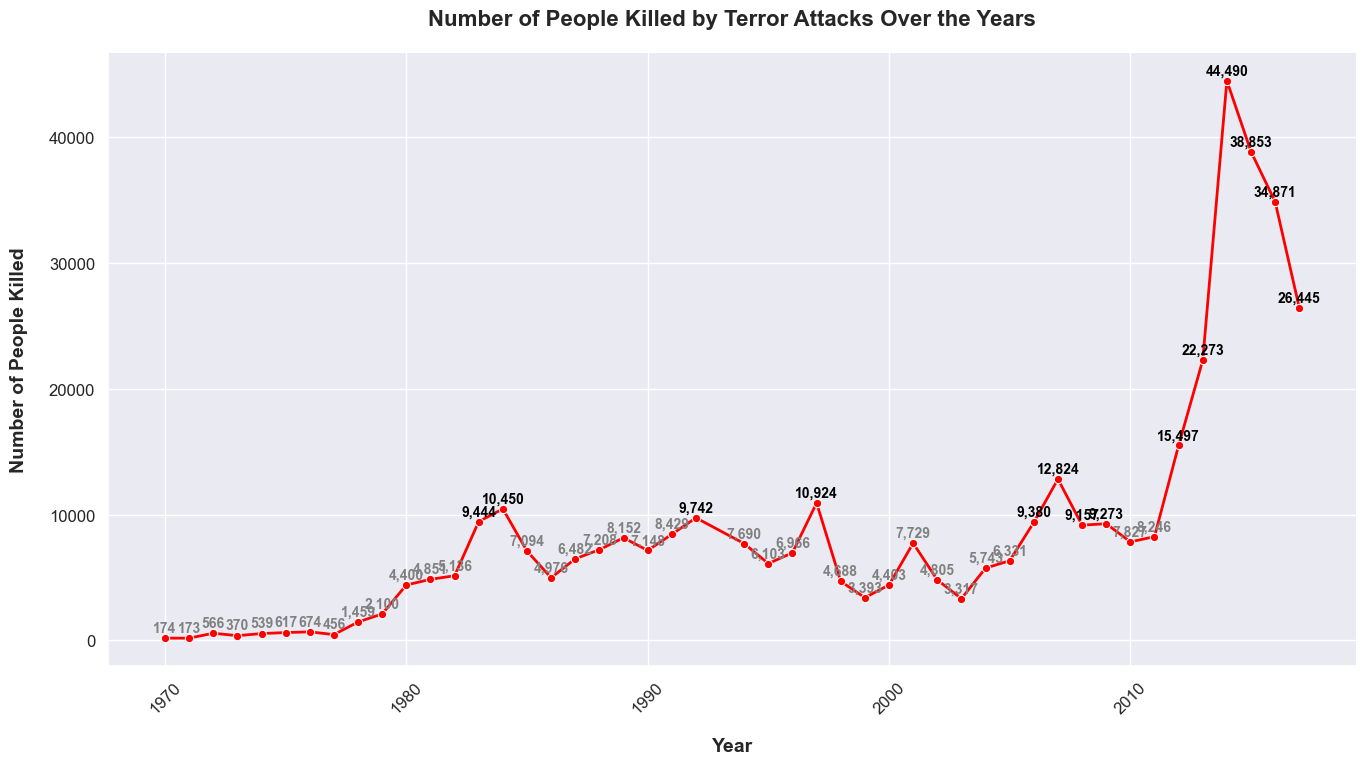

In [90]:
# 테러로 인해 죽은 사람 수 (연도별)

# 그래프 설정
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=data, 
    x='Year', 
    y='Killed', 
    estimator='sum', 
    ci=None, 
    marker='o', 
    color='red', 
    linewidth=2
)

# 제목 및 레이블 설정
plt.title('Number of People Killed by Terror Attacks Over the Years', fontsize=16, weight='bold', pad=20)
plt.xlabel('Year', fontsize=14, weight='bold', labelpad=15)
plt.ylabel('Number of People Killed', fontsize=14, weight='bold', labelpad=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
sns.despine()

# 값 표시 (특정 연도 값 강조)
killed_data = data.groupby('Year')['Killed'].sum()
for year, killed in killed_data.items():
    plt.text(
        x=year, 
        y=killed + 500,  # 값의 약간 위에 위치
        s=f"{int(killed):,}", 
        ha='center', 
        fontsize=10, 
        color="black" if killed > killed_data.mean() else "gray", 
        weight='bold'
    )

# 레이아웃 정리 및 출력
plt.tight_layout()
plt.show()

/var/folders/t1/c1qhch0n58j9kw492l10zm5m0000gn/T/ipykernel_37227/2603502298.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


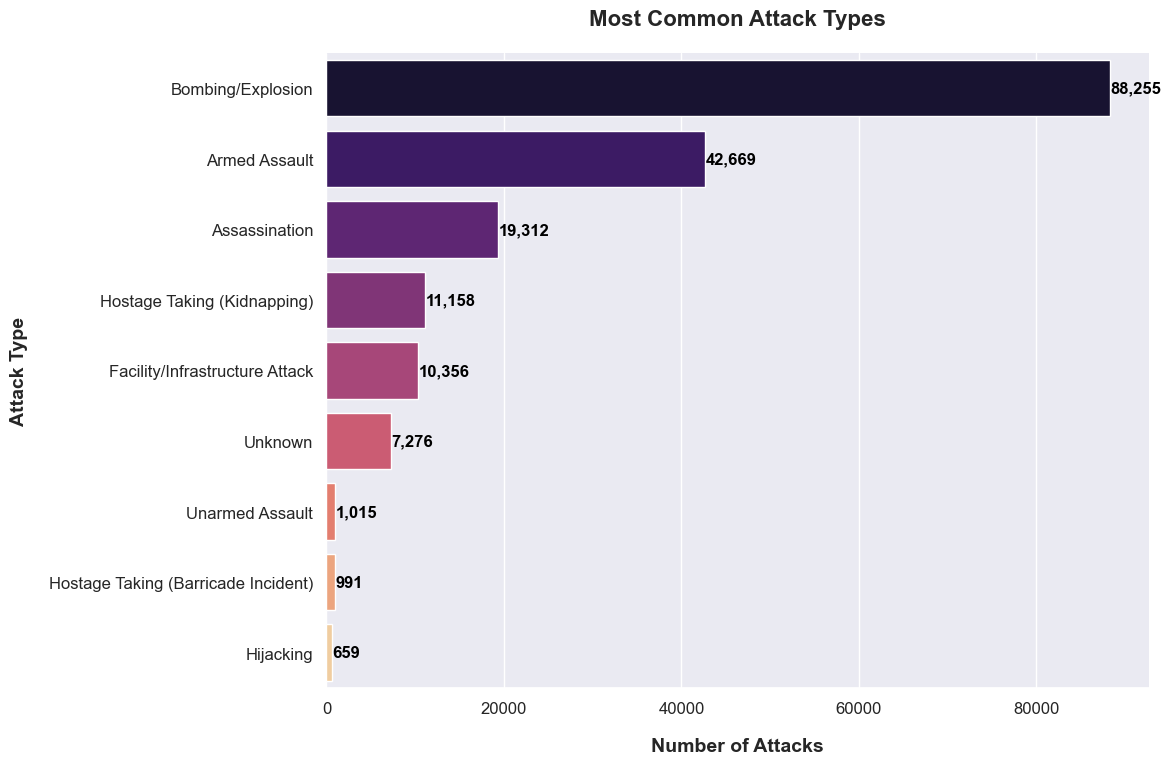

In [91]:
# 공격 유형(Attacktype) 시각화

# 그래프 설정
plt.figure(figsize=(12, 8))
sns.countplot(
    data=data, 
    y="Attacktype", 
    palette="magma", 
    order=data["Attacktype"].value_counts().index  # 공격 유형별 빈도 순으로 정렬
)

# 제목 및 레이블 설정
plt.title("Most Common Attack Types", fontsize=16, weight='bold', pad=20)
plt.xlabel("Number of Attacks", fontsize=14, weight='bold', labelpad=15)
plt.ylabel("Attack Type", fontsize=14, weight='bold', labelpad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()

# 값 표시
for index, value in enumerate(data["Attacktype"].value_counts().values):
    plt.text(
        x=value + 50,  # 막대 오른쪽에 여유 공간을 두고 표시
        y=index, 
        s=f"{value:,}",  # 숫자를 쉼표로 포맷팅
        va='center',
        fontsize=12,
        color="black",
        weight='bold'
    )

# 레이아웃 정리 및 그래프 출력
plt.tight_layout()
plt.show()


<Figure size 1400x1000 with 0 Axes>

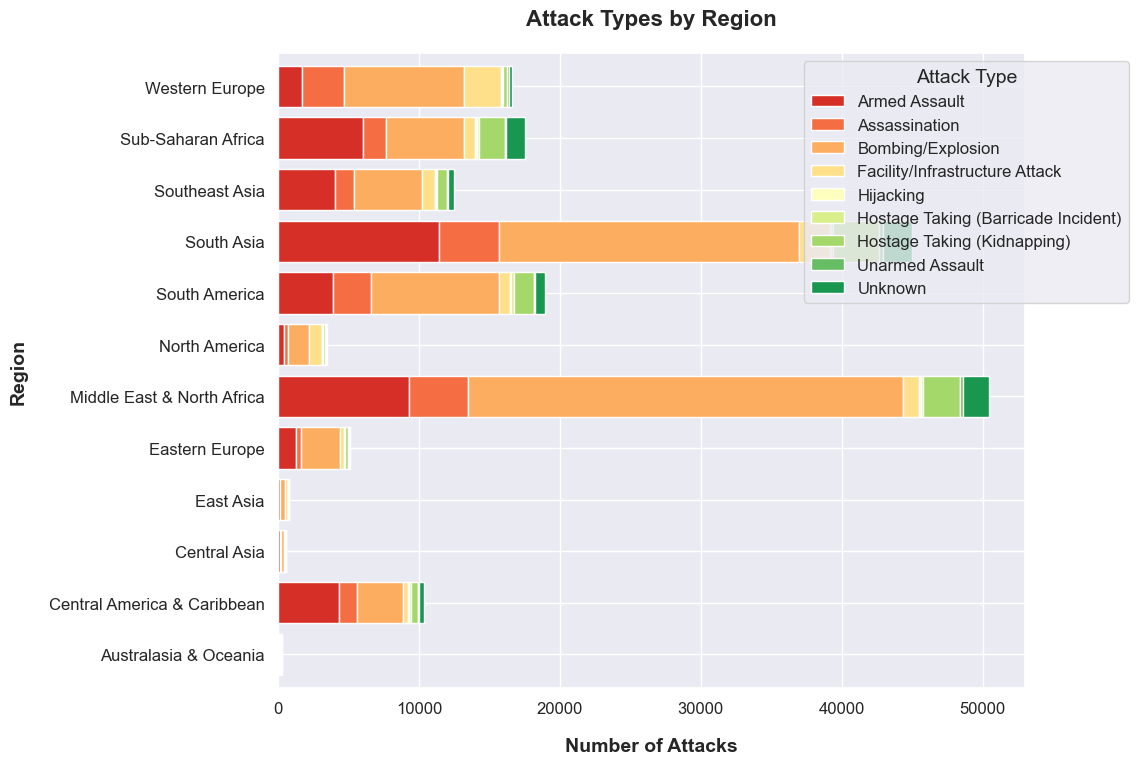

In [101]:
# 지역별 테러 공격 타입 분석

# 데이터 준비 및 그래프 설정
plt.figure(figsize=(14, 10))
pd.crosstab(data.Region, data.Attacktype).plot.barh(
    stacked=True, 
    width=0.8, 
    color=sns.color_palette('RdYlGn', 9), 
    figsize=(12, 8)
)

# 제목 및 레이블 설정
plt.title("Attack Types by Region", fontsize=16, weight='bold', pad=20)
plt.xlabel("Number of Attacks", fontsize=14, weight='bold', labelpad=15)
plt.ylabel("Region", fontsize=14, weight='bold', labelpad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 범례 설정
plt.legend(
    title="Attack Type", 
    fontsize=12, 
    title_fontsize=14, 
    loc="upper right", 
    bbox_to_anchor=(1.15, 1)
)

# 레이아웃 정리 및 그래프 출력
plt.tight_layout()
plt.show()


# 가설 검증

## 가설 1

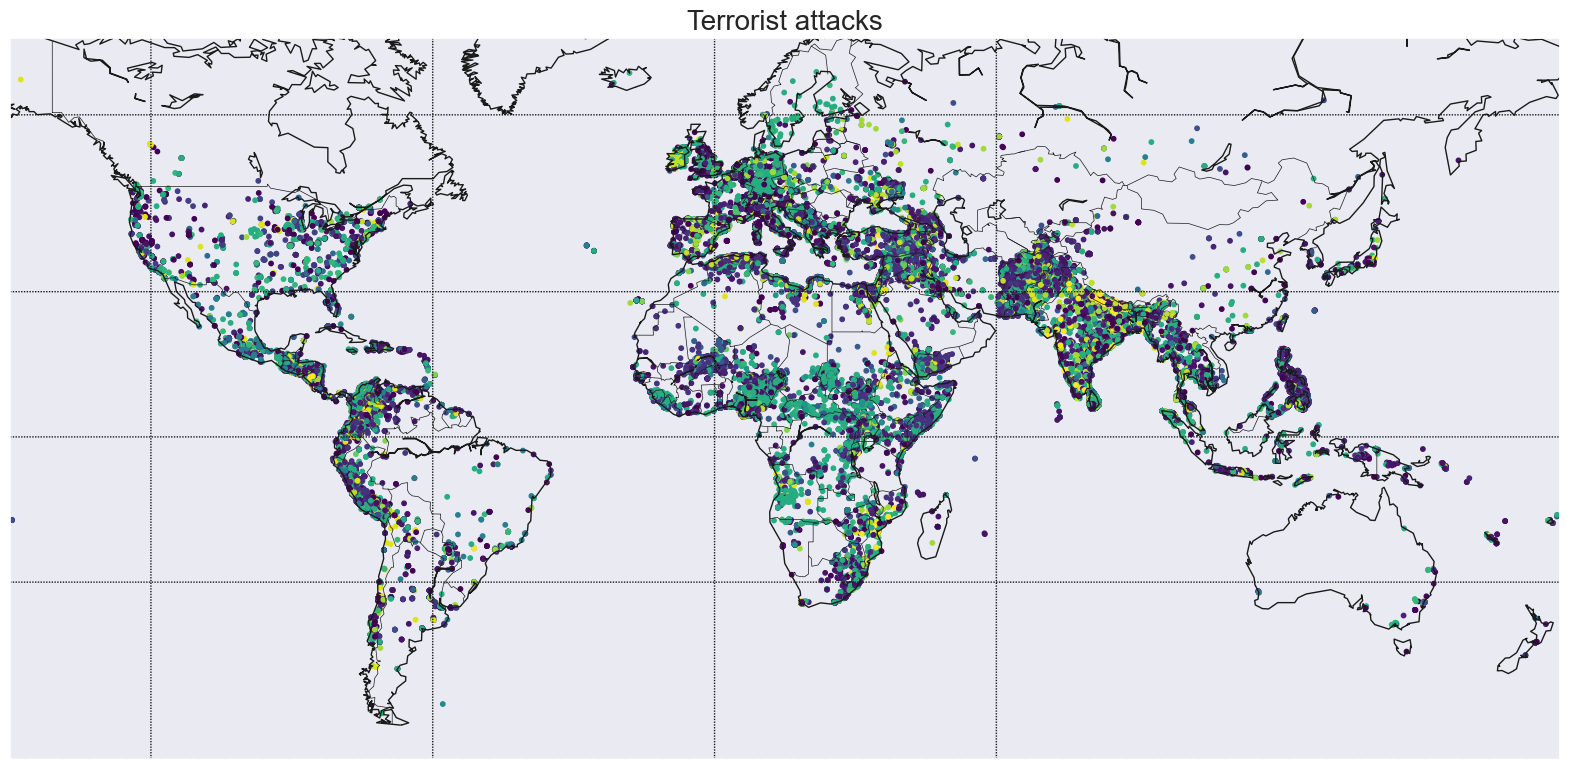

In [ ]:
#map draw function
def drawMap(col1,size2,label4,metr=100,colmap='hot',ds=df,scat=False):
    m = Basemap(projection='mill',llcrnrlat=-60,urcrnrlat=70,llcrnrlon=-150,urcrnrlon=180,resolution='c')
    m.drawcoastlines()
    m.drawcountries()
    m.drawparallels(np.arange(-120,91.,30.))
    m.drawmeridians(np.arange(-120,90.,60.))
    datatt = ds
    a_1 = datatt[col1].values
    if size2:
        a_2 = datatt[size2].values
    else: a_2 = 1
    m.scatter(datatt['longitude'].values, datatt['latitude'].values, latlon=True,c=a_1,s=metr*a_2,cmap=colmap,alpha=1)

plt.figure(figsize=(20,20))
plt.title('Terrorist attacks', fontsize=20)
#targetype을 기준으로 색갈을 부여하며 점을 map에 찍기
drawMap(col1='targtype1', size2=False,label4='',metr=10,colmap='viridis',ds=df)

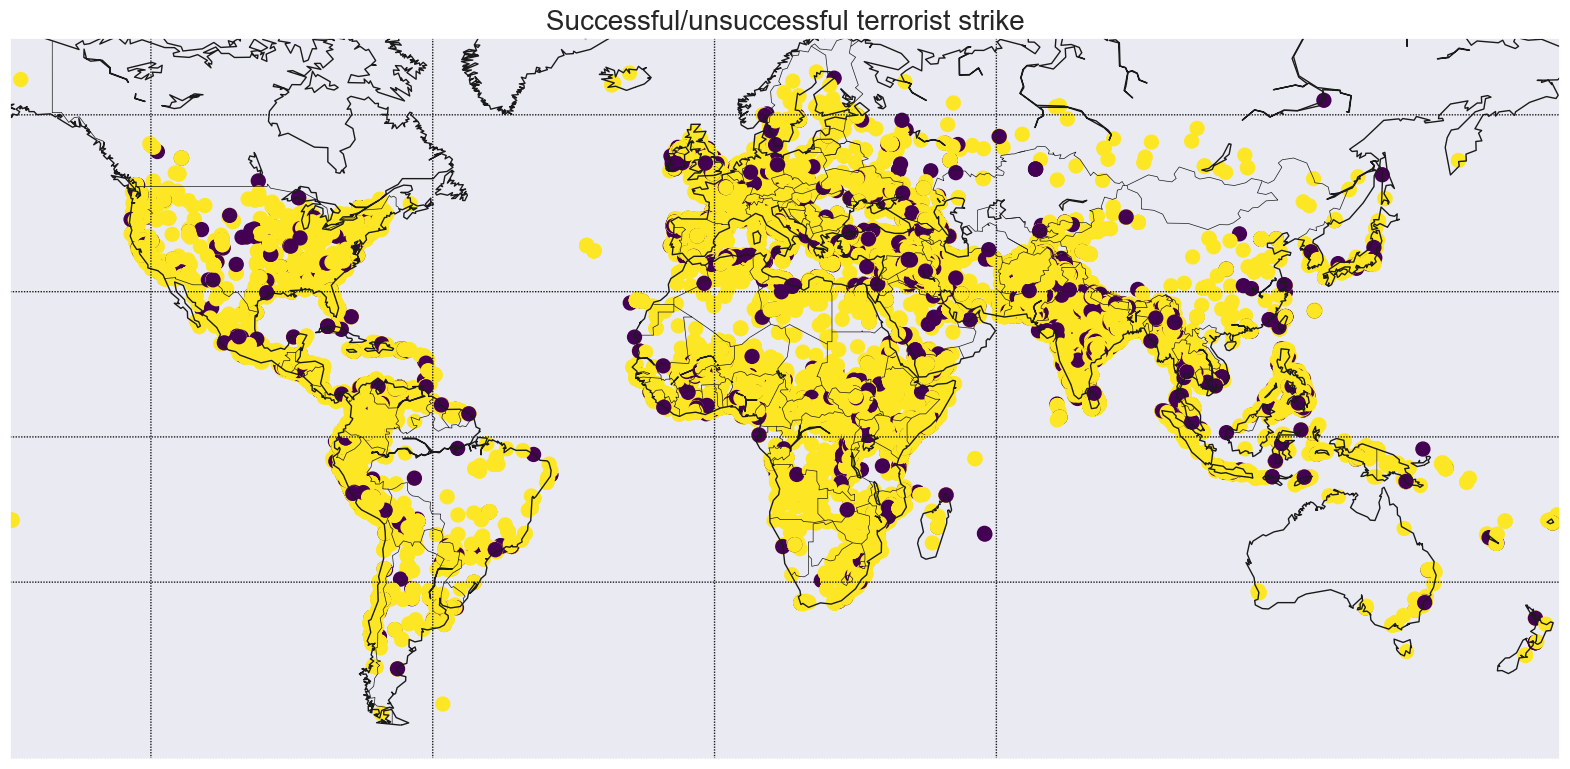

In [ ]:
plt.figure(figsize=(20,20))
plt.title('Successful/unsuccessful terrorist strike', fontsize=20)
#success의 여부에 따라서 map에 점 찍기
drawMap(col1='success', size2=False,label4='',metr=10,colmap='viridis',ds=df)

## 가설 2

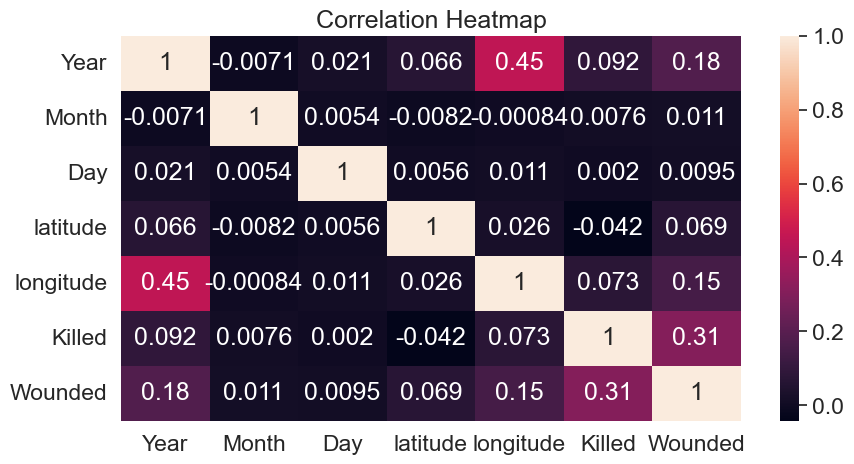

In [ ]:
# 수치형 데이터만 선택
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# 상관계수 계산
corr = numeric_data.corr(method='spearman')

# 히트맵 시각화
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap")
plt.show()

## 가설 3

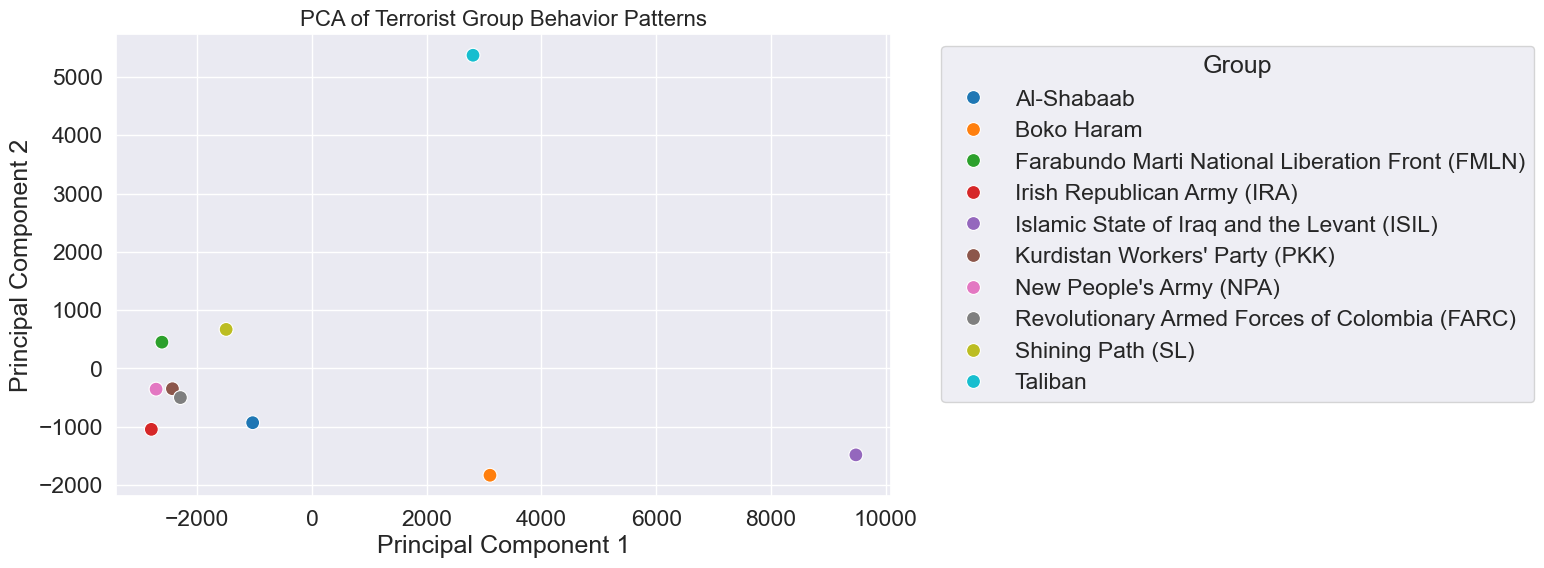

In [ ]:
from sklearn.decomposition import PCA

# 데이터 전처리: 주요 테러 단체와 공격 유형/대상 필터링
group_data = data[data['Group'] != 'Unknown']  # Unknown 제거
group_data = group_data[group_data['Group'].isin(group_data['Group'].value_counts().head(10).index)]  # 상위 10개 단체

# Pivot Table 생성
pivot_table = group_data.pivot_table(
    index='Group',
    columns=['Weapon_type', 'Target_type'],
    values='Killed',
    aggfunc='sum',
    fill_value=0
)

# PCA 수행
pca = PCA(n_components=2)
pca_result = pca.fit_transform(pivot_table)

# PCA 결과를 DataFrame으로 변환
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'], index=pivot_table.index)

# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue=pca_df.index, palette='tab10', s=100)
plt.title('PCA of Terrorist Group Behavior Patterns', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

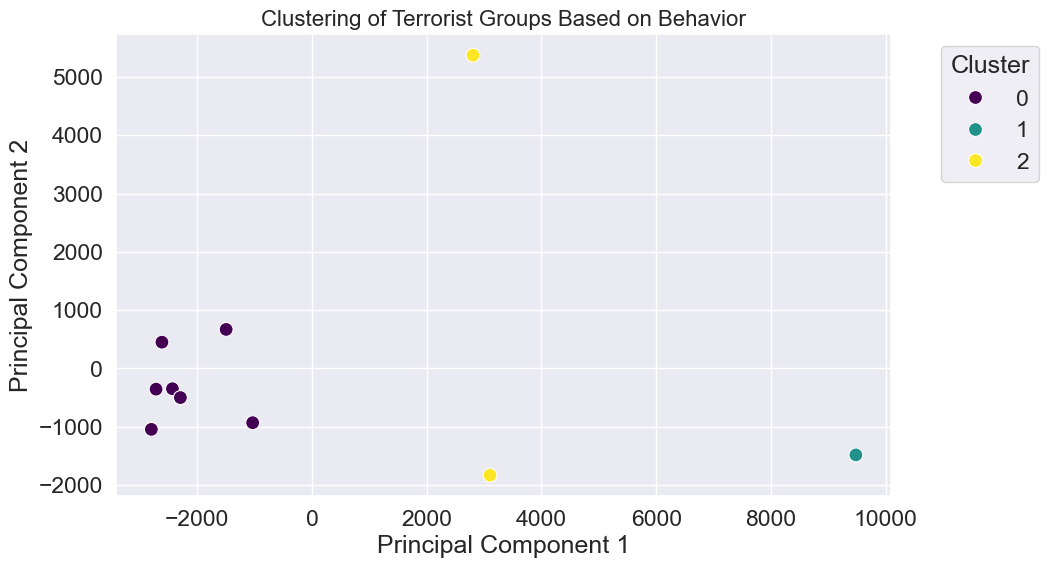

In [98]:
from sklearn.cluster import KMeans

# KMeans 클러스터링
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pivot_table)

# 클러스터 결과 추가
pca_df['Cluster'] = clusters

# 군집화 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100)
plt.title('Clustering of Terrorist Groups Based on Behavior', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##결과 비슷한 행동 패턴을 가진 그룹을 묶어서 분석할 수 있다.